In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_openml #veriyi aldık.
dataset=fetch_openml("mnist_784") #28x28=784

In [6]:
X,y=dataset["data"],dataset["target"]

In [7]:
X=X/255.0

In [8]:
X[585:].shape

(69415, 784)

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y.shape,y[100]

((70000,), '5')

In [11]:
y.shape[0]

70000

In [12]:
y.astype('int32')

array([5, 0, 4, ..., 4, 5, 6])

In [13]:
digits = 10#one-hot
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [14]:
Y_new.shape

(10, 70000)

In [15]:
Y_new[:,100]#yani 100. eleman 5 demek oluyor.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [16]:
y[0,100]

'5'

In [17]:
y.shape

(1, 70000)

In [19]:
X.shape

(70000, 784)

In [21]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [23]:
X.shape

(70000, 784)

In [24]:
X_train.shape

(784, 60000)

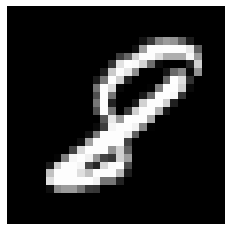

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [18]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = "gray")
plt.axis("off")
plt.show()
Y_train[:,i]

In [37]:
def compute_multiclass_loss(Y, Y_hat): #maliyet fonksiyonu

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [38]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [39]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [40]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  10.16434755996978
Epoch 100 cost:  0.7341589924200048
Epoch 200 cost:  0.5569760808044821
Epoch 300 cost:  0.48114907304148874
Epoch 400 cost:  0.43508900000850836
Epoch 500 cost:  0.40276436065024984
Epoch 600 cost:  0.3782101743430582
Epoch 700 cost:  0.3585677907350214
Epoch 800 cost:  0.34227022397547957
Epoch 900 cost:  0.3283840685720398
Epoch 1000 cost:  0.31631223169999334
Epoch 1100 cost:  0.30563908937337564
Epoch 1200 cost:  0.2960729422811939
Epoch 1300 cost:  0.2874090388987525
Epoch 1400 cost:  0.27949968620045923
Epoch 1500 cost:  0.2722327067700578
Epoch 1600 cost:  0.26551938393882574
Epoch 1700 cost:  0.2592881387789801
Epoch 1800 cost:  0.2534802223500302
Epoch 1900 cost:  0.24804676290274677
Final cost: 0.24299607965377493


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 954    0    8    3    2   10   12    3    2    4]
 [   0 1108    5    1    4    0    4    9    2    5]
 [   1    3  930   18    9    2    7   23    8    4]
 [   6    4   20  919    1   27    1    9   26   13]
 [   0    0   10    1  903    3   16    6    7   41]
 [   9    2    1   24    0  804   15    4   20    8]
 [   5    2   12    2   15    8  899    0   18    1]
 [   3    2   14   12    2    6    0  946   11   21]
 [   2   14   27   21    8   26    4    2  867   19]
 [   0    0    5    9   38    6    0   26   13  893]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       998
           1       0.98      0.97      0.97      1138
           2       0.90      0.93      0.91      1005
           3       0.91      0.90      0.90      1026
           4       0.92      0.91      0.92       987
           5       0.90      0.91      0.90       887
           6       0.94      0.93      0.94       962
           7       0.92      0.93   